Exploring Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [4]:
ind = np.array([[3, 7],
                [4, 5]])

x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [9]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

Combined indexing

In [10]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [11]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [12]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [13]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Example: Selecting random points

In [15]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape # nos dice cuantas filas y columnas tiene la matriz

(100, 2)

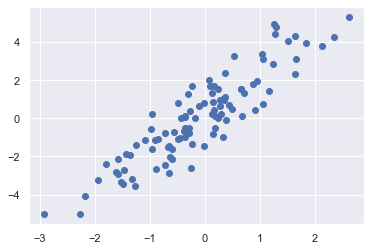

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [17]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 3, 32, 88, 23, 16,  6, 21, 77, 24, 37, 98, 28, 75, 47, 49, 46, 94,
       56, 95, 52])

In [18]:
selection = X[indices]
selection.shape

(20, 2)

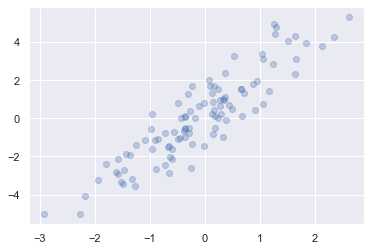

In [19]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200)

Modifying values with fancy indexing

In [21]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [22]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [23]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x) # solo queda el 6 y no el 4 porque primero hace el cambio de x[0] = 4 y luego x[0] = 6 quedando este último

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x # vemos que no vuelve a sumar por la posición por donde ya pasó

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [25]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x) # esta opción si suma 1 cada vez que pasa por la posición

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


Example: Binning data

In [27]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
count = np.zeros_like(bins)

# find the appropiate bin for each x
i = np.searchsorted(bins, x)

#add 1 to each of these bins
np.add.at(count, i, 1)

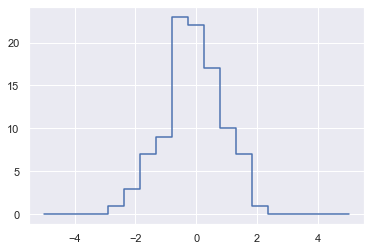

In [32]:
# plot the results 
plt.plot(bins, count, linestyle='-', drawstyle='steps');

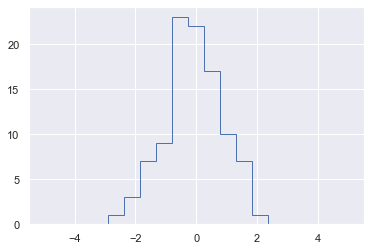

In [34]:
plt.hist(x, bins, histtype='step');

In [35]:
print("NumPy routine:")
%timeit count, edges = np.histogram(x, bins)

print("Custom routine:") # custom es mejor para pequeños datasets
%timeit np.add.at(count, np.searchsorted(bins, x), 1)

NumPy routine:
33.4 µs ± 383 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
16.2 µs ± 304 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
x = np.random.randn(1000000)
print("NumPy routine:") # numpy es mejor para datasets grandes
%timeit count, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(count, np.searchsorted(bins, x), 1)

NumPy routine:
70 ms ± 266 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
119 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
